In [2]:
# 1, 2번 문제

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
from IPython.display import display

data = {'분야': [], 'Time': [], 'Title': [], 'content': [],
        '전기': [], '에너지': [], '원자력': [], '수력': [], '화력': []}
links = []

# 첫 번째 URL 데이터 수집 (과학 분야)
for i in range(1, 23):
    try:
        target = 'https://www.etnews.com/news/section.html?id1=20&id2=020&page=' + str(i)
        html = urlopen(target)
        bs = soup(html.read(), 'html.parser')
        tags = bs.select('p > a')
        for tag in tags:
            link = tag.get('href')
            if link not in 'http':
                links.append(link)
    except:
        pass

# 데이터 프레임에 추가 (과학 분야)
for link in links:
    if 'https' in str(link):
        pass
    else:
        result = 'https://www.etnews.com' + link
        try:
            html = urlopen(result)
            bs = soup(html.read(), 'html.parser')
            Time = bs.time.text[6:]
            Title = bs.title.text  # 제목

            # <p> 태그 내의 텍스트를 추출하여 본문에 추가
            content = []
            for paragraph in bs.find_all('article', {'class': 'article_body_wrap'})[0].find_all('p'):
                content.append(paragraph.text.replace('\n', ''))
            content_text = ''.join(content)
            ele = content_text.count('전기')
            eg = content_text.count('에너지')
            h = content_text.count('원자력')
            w = content_text.count('수력')
            fi = content_text.count('화력')

            # 데이터 프레임에 추가 (과학 분야)
            data['분야'].append('과학')
            data['Time'].append(Time)
            data['Title'].append(Title)
            data['content'].append(content_text)
            data['전기'].append(ele)
            data['에너지'].append(eg)
            data['원자력'].append(h)
            data['수력'].append(w)
            data['화력'].append(fi)
        except:
            pass

# 데이터 프레임 생성 (과학 분야)
a_df = pd.DataFrame(data)

# 두 번째 URL 데이터 수집 (에너지 분야)
data2 = {'분야': [], 'Time': [], 'Title': [], 'content': [],
         '전기': [], '에너지': [], '원자력': [], '수력': [], '화력': []}
links2 = []

for i in range(1, 82):
    try:
        target = 'https://www.etnews.com/news/section.html?id1=20&id2=065&page=' + str(i)
        html = urlopen(target)
        bs = soup(html.read(), 'html.parser')
        tags = bs.select('p > a')
        for tag in tags:
            link = tag.get('href')
            if link not in 'http':
                links2.append(link)
    except:
        pass

# 데이터 프레임에 추가 (에너지 분야)
for link in links2:
    if 'https' in str(link):
        pass
    else:
        result = 'https://www.etnews.com' + link
        try:
            html = urlopen(result)
            bs = soup(html.read(), 'html.parser')
            Time = bs.time.text[6:]
            Title = bs.title.text  # 제목

            # <p> 태그 내의 텍스트를 추출하여 본문에 추가
            content = []
            for paragraph in bs.find_all('article', {'class': 'article_body_wrap'})[0].find_all('p'):
                content.append(paragraph.text.replace('\n', ''))
            content_text = ''.join(content)
            ele = content_text.count('전기')
            eg = content_text.count('에너지')
            h = content_text.count('원자력')
            w = content_text.count('수력')
            fi = content_text.count('화력')

            # 데이터 프레임에 추가 (에너지 분야)
            data2['분야'].append('에너지')
            data2['Time'].append(Time)
            data2['Title'].append(Title)
            data2['content'].append(content_text)
            data2['전기'].append(ele)
            data2['에너지'].append(eg)
            data2['원자력'].append(h)
            data2['수력'].append(w)
            data2['화력'].append(fi)
        except:
            pass

# 데이터 프레임 생성 (에너지 분야)
b_df = pd.DataFrame(data2)

# 두 데이터 프레임을 합칠 때 'ignore_index=True' 옵션을 사용하여 인덱스를 재설정
result = pd.concat([a_df, b_df], ignore_index=True)


,분야,Time,Title,content,전기,에너지,원자력,수력,화력
0,과학,2023-09-13 16:00,[과학기술이 미래다] 〈102〉국내 첫 퍼스널 컴퓨터 경진대회 - 전자신문,1984년 4월 22일. 제1회 퍼스널 컴퓨터 경진대회가 이날 오전 9시 서울 송파...,3,0,0,0,0
1,과학,2023-09-13 07:27,나노·소재 성과공유회 - 전자신문,나노·소재분야 R&D 정책 및 우수 연구성과를 발표하고 성과물을 공유하는 나노·소재...,0,0,0,0,0
2,과학,2023-09-12 10:46,[알림] 테크비즈코리아 2023 - 전자신문,전자신문사가 올해에도 우리 연구 현장의 사업화 유망기술을 민간기업과 투자자에 소개하...,1,1,2,0,0
3,과학,2023-09-12 07:25,드럼치는 로봇 '모펫' 입니다 - 전자신문,국내 연구진이 음악 빅데이터 기반 인공지능(AI)을 통해 인간과 상호작용하며 합주 ...,0,0,0,0,0
4,과학,2023-09-11 16:11,드럼치는 로봇 '모펫' 입니다 - 전자신문,국내 연구진이 음악 빅데이터 기반 인공지능(AI)을 통해 인간과 상호작용하며 합주 ...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1523,에너지,2023-03-16 12:00,환경부 '플레어스택' 규제 혁신…“탄소배출량 148만톤 감축 기대” - 전자신문,환경부가 '가스연소 굴뚝(플레어스택)' 시설 관리 규정 등을 합리화하는 등 산업현장...,0,0,0,0,0
1524,에너지,2023-03-16 11:27,전기차 충전기 살펴보는 이재명 대표 - 전자신문,한국전기차사용자협회가 주최하는 EVuff@EV트렌드코리아 세미나가 '충전인프라 공급...,2,0,0,0,0
1525,에너지,2023-03-16 11:00,"정부, 올 하반기 수소특화단지 지정 시작 - 전자신문",산업통상자원부가 올해 하반기 수소특화단지 지정 절차를 시작한다. 수소기업이 밀집한 ...,1,0,0,0,0
1526,에너지,2023-03-16 11:00,"정부, 신재생에너지 사업자에 2970억원 보증 공급 - 전자신문",정부가 올해 신재생에너지 사업자에 2970억원 보증을 공급한다. 자가용 발전까지 지...,6,12,0,0,0


In [7]:
# 3번 문제

import pandas as pd

# '전기', '에너지', '원자력', '수력', '화력' 열에 대한 평균, 표준편차, 최빈값 계산
mean_values = result[['전기', '에너지', '원자력', '수력', '화력']].mean()
std_values = result[['전기', '에너지', '원자력', '수력', '화력']].std()
mode_values = result[['전기', '에너지', '원자력', '수력', '화력']].max()

# 평균, 표준편차, 최빈값을 데이터프레임으로 만들기
summary_df = pd.DataFrame({'평균': mean_values, '표준편차': std_values, '최빈값': mode_values})

# 결과를 출력
print(display(summary_df))


,평균,표준편차,최빈값
전기,1.055628,3.124598,37
에너지,2.304974,4.894692,56
원자력,0.255236,1.283225,19
수력,0.042539,0.232064,4
화력,0.022906,0.201823,4


None


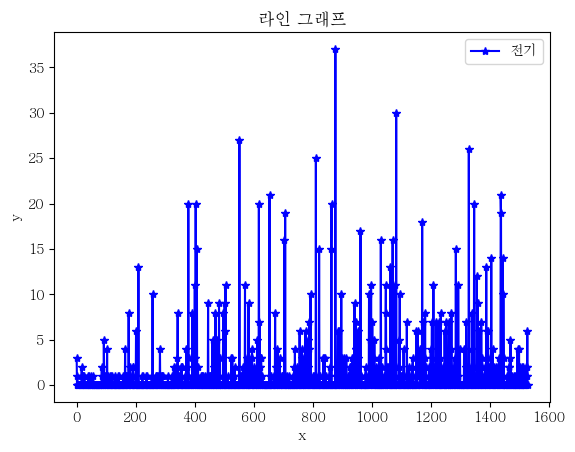

In [36]:
# 4번 문제

# 라인 그래프

import matplotlib.pyplot as plt

plt.plot(result[['전기']], '*-b', label='전기') 
plt.title('라인 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

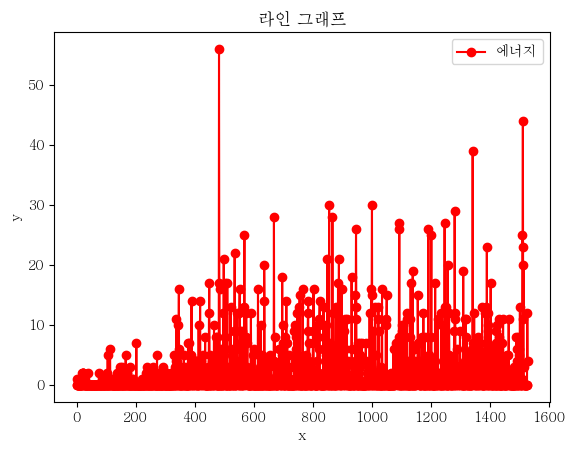

In [37]:
plt.plot(result[['에너지']], 'o-r', label='에너지') 
plt.title('라인 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

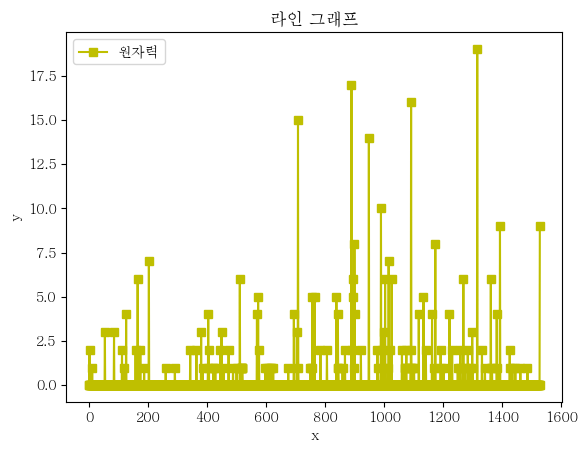

In [32]:
plt.plot(result[['원자력']], 's-y', label='원자력') 
plt.title('라인 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

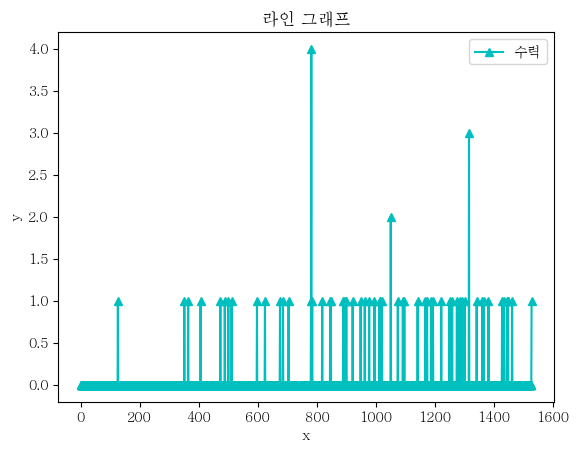

In [33]:
plt.plot(result[['수력']], '^-c', label='수력') 
plt.title('라인 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

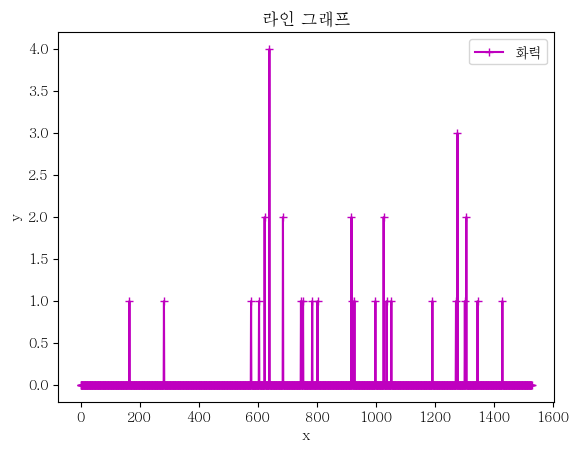

In [34]:
plt.plot(result[['화력']], '+-m', label='화력')
plt.title('라인 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

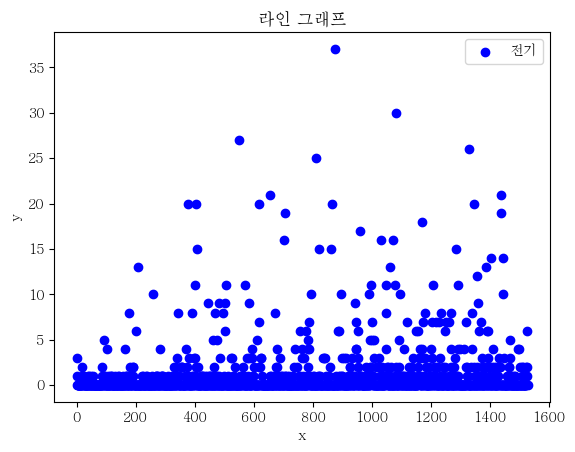

In [35]:
#산점도 그래프

plt.scatter(result.index, result['전기'], label='전기', marker='o', color='b')
plt.title('산점도 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

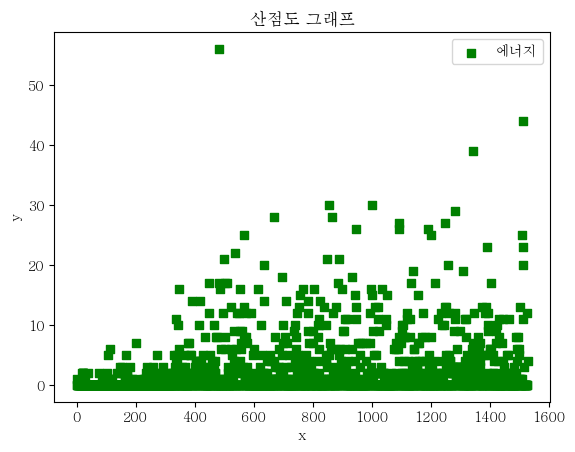

In [30]:
plt.scatter(result.index, result['에너지'], label='에너지', marker='s', color='g')
plt.title('산점도 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

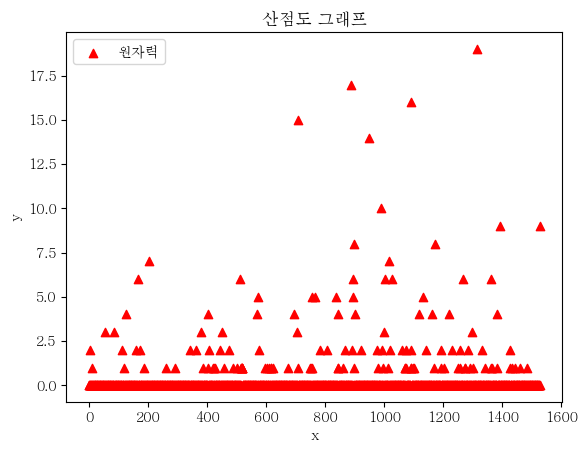

In [31]:
plt.scatter(result.index, result['원자력'], label='원자력', marker='^', color='r')
plt.title('산점도 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

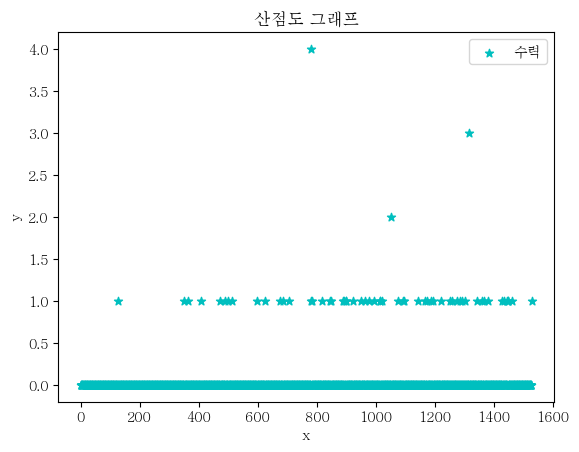

In [38]:
plt.scatter(result.index, result['수력'], label='수력', marker='*', color='c')
plt.title('산점도 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

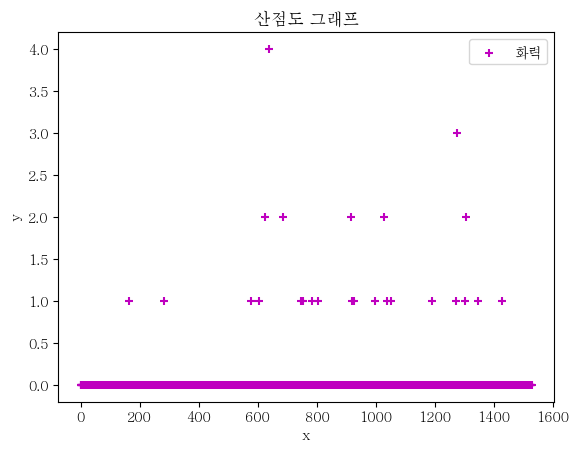

In [39]:
plt.scatter(result.index, result['화력'], label='화력', marker='+', color='m')
plt.title('산점도 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()